## Background / Motivation

According to <i><a href="https://www.foodsafetynews.com/2022/10/misidentification-increases-risk-of-poisoning-as-mushroom-hunters-head-out-to-forage/">foodsafetynews.net</a></i>, approximately 7,500 people are poisoned by mushrooms each year [1], and with so many varieties it can be hard to know which are edible, and which are not. In order to determine which are safe to consume, we mush evaluate the characteristics that are associated with edibility. Unfortunatley, there is no one easily discernible trait that can be assessed to definitively determine edibility, resulting in the need for a prediction model.

## Problem statement 

Create an accurate model to predict if a random mushroom is edible or poisonous based upon its secondary characteristics.

## Data sources

To build our model, we utilized a public dataset provided by the <a href="https://archive.ics.uci.edu/ml/datasets/Mushroom">Univerity of California Irvine Machine Learning Repository</a>. It consisits of descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Genuses, and features 22 descriptive attributes and characteristics for each sample. Each is identified as being either edible or poisonous, which is the response in our modeling.

## Stakeholders

A variety of individuals and groups could benefit from the model we created. <b>Individuals in survival situations</b>, in need of food, who have found mushrooms and wish to know if they are edible or not, as to not inadvertantly poison themself and increase their risk while in a difficult situation. Additionally <b>a chef</b> who has been sent a new mushroom type that they are unfamiliar with to use in a dish may wish to analyze it properly first in order to ensure they will not be poisoning their patrons. And lastly, <b>researchers</b> who discover a new mushroom species with find the model useful as they synthesize information about the mushroom for their report as they likely will want to assess edibility without puting themselves or a research assistant at risk.

## Data quality check / cleaning / preparation 

The dataset used is high quality, with only one column, `stalk-root`, missing a large number of values, and one row, the last, with entirely missing values. Due to the large size of the dataset, this row was removed, as well as the column since there were numerous other predictors that can be used to construct an effective model. Additionally, we removed the column `veil-type` since all entries had the same value, meaning it would not meaningfully influence the model.

Our data began with 8,417 entries, and ended with 8,716.
Our data began with 23 categorical columns, and ended with 20.

| EDIBILITY | Count | Portion (%) |     | CAP SHAPE | Count | Portion (%) |     | CAP SURFACE | Count | Portion (%) |
| :-------: | :---: | :---------: | :-: | :-------: | :---: | :---------: | :-: | :---------: | :---: | :---------: |
| Edible    | 4488  | 53.23       |     | Convex    | 3796  | 45.10       |     | Scaly       | 3268  | 38.83       |
| Poisonous | 3928  | 46.67       |     | Flat      | 3292  | 39.12       |     | Smooth      | 2684  | 31.89       |
| | | |                                 | Knobbed   | 840   | 9.98        |     | Fibrous     | 2460  | 29.23       |
| | | |                                 | Bell      | 452   | 5.37        |     | | | |
| | | |                                 | | | |                                 | | | |

| CAP COLOR | Count | Portion (%) |     | BRUISES | Count | Portion (%) |     | ODOR      | Count | Portion (%) |
| :-------: | :---: | :---------: | :-: | :-----: | :---: | :---------: | :-: | :-------: | :---: | :---------: |
| Brown     | 2320  | 27.57       |     | No      | 5040  | 59.89       |     | None      | 3808  | 45.25       |
| Gray      | 2096  | 24.90       |     | No      | 5040  | 59.89       |     | Foul      | 2160  | 25.67       |
| Red       | 1500  | 17.82       |     | Bruises | 3376  | 40.11       |     | Fishy     | 576   | 6.84        |
| Yellow    | 1072  | 12.74       |     | | | |                               | Spicy     | 576   | 6.84        |
| White     | 1040  | 12.36       |     | | | |                               | | | |
| | | |                                 | | | |                               | | | |

| GILL ATTACHMENT | Count | Portion (%) |     | GILL SPACING | Count | Portion (%) |     | GILL SIZE | Count | Portion (%) |
| :-------------: | :---: | :---------: | :-: | :----------: | :---: | :---------: | :-: | :-------: | :---: | :---------: |
| Free            | 8200  | 97.43       |     | Close        | 6824  | 81.08       |     | Broad     | 5880  | 69.87       |
| Attached        | 216   | 2.57        |     | Crowded      | 1592  | 18.92       |     | Narrow    | 2536  | 30.13       |
| | | |                                       | | | |                                    | | | |

| GILL COLOR | Count | Portion (%) |     | STALK SHAPE | Count | Portion (%) |     | STALK SURFACE ABOVE RING | Count | Portion (%) |
| :--------: | :---: | :---------: | :-: | :---------: | :---: | :---------: | :-: | :----------------------: | :---: | :---------: |
| Buff       | 1728  | 20.53       |     | Tapering    | 4864  | 57.79       |     | Smooth                   | 5316  | 63.17       |
| Pink       | 1556  | 18.49       |     | Enlarging   | 3552  | 42.21       |     | Silky                    | 2384  | 28.33       |
| White      | 1232  | 14.64       |     | | | |                                   | Fibrous                  | 692   | 8.22        |
| Brown      | 1112  | 13.21       |     | | | |                                   | Scaly                    | 24    | 0.29        |
| | | |                                  | | | |                                   | | | |

| STALK SURFACE BELOW RING | Count | Portion (%) |     | VEIL COLOR | Count | Portion (%) |     | RING NUMBER | Count | Portion (%) |
| :----------------------: | :---: | :---------: | :-: | :--------: | :---: | :---------: | :-: | :---------: | :---: | :---------: |
| Smooth                   | 5076  | 60.31       |     | White      | 8216  | 97.62       |     | One         | 7768  | 92.30       |
| Silky                    | 2304  | 27.38       |     | Orange     | 96    | 1.14        |     | Two         | 600   | 7.13        |
| Fibrous                  | 740   | 8.79        |     | Pink       | 96    | 1.14        |     | None        | 48    | 0.57        |
| Scaly                    | 296   | 3.52        |     | Yellow     | 8     | 0.10        |     | | | |
| | | |                                                | | | |                                  | | | |

| RING TYPE  | Count | Portion (%) |     | SPORE PRINT COLOR | Count | Portion (%) |     | POPULATION | Count | Portion (%) |
| :--------: | :---: | :---------: | :-: | :---------------: | :---: | :---------: | :-: | :--------: | :---: | :---------: |
| Pendant    | 3968  | 47.15       |     | White             | 2424  | 28.80       |     | Several    | 4064  | 48.29       |
| Evanescent | 3056  | 36.31       |     | Brown             | 2096  | 24.90       |     | Solitary   | 1712  | 20.34       |
| Large      | 1296  | 15.40       |     | Black             | 2000  | 23.76       |     | Scattered  | 1376  | 16.35       |
| | | |                                  | Chocolate         | 1632  | 19.39       |     | | | |
| | | |                                  | | | |                                         | | | |

| HABITAT | Count | Portion (%) |     | STALK COLOR ABOVE RING | Count | Portion (%) |     | STALK COLOR ABOVE RING | Count | Portion (%) |
| :-----: | :---: | :---------: | :-: | :--------------------: | :---: | :---------: | :-: | :--------------------: | :---: | :---------: |
| Woods   | 3160  | 37.55       |     | White                  | 4744  | 56.37       |     | White                  | 4640  | 55.13       |
| Grasses | 2404  | 28.56       |     | Pink                   | 1872  | 22.24       |     | Pink                   | 1872  | 22.24       |
| Paths   | 1144  | 13.59       |     | Gray                   | 576   | 6.84        |     | Gray                   | 576   | 6.84        |
| Leaves  | 856   | 10.17       |     | Brown                  | 448   | 5.32        |     | Brown                  | 536   | 6.37        |
| | | |                               | Buff                   | 432   | 5.13        |     | Buff                   | 432   | 5.13        |

## Exploratory data analysis - INCOMPLETE

* From the tables above, we were interested to see since `stalk-color-above-ring` and `stalk-color-below-ring` appeared nearly identical if we would be able to remove one of these since they convey the same information by the value_counts. However, upon further exploration, we found that approximately 3,000 entries had stalk color above and below not match resulting, meaning it was quite coincidental that the total counts ended so similar. 
* We found this same pattern as above to occur in `stalk-surface-above-ring` and `stalk-surface-below-ring`.
* Through plotting count plots for each predictors that we have, we were able to pinpoint `odor`as a useful predictor, given that there is a group of categories within `odor` that 
* **ADD JACKSONS PLOTS IN HERE**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

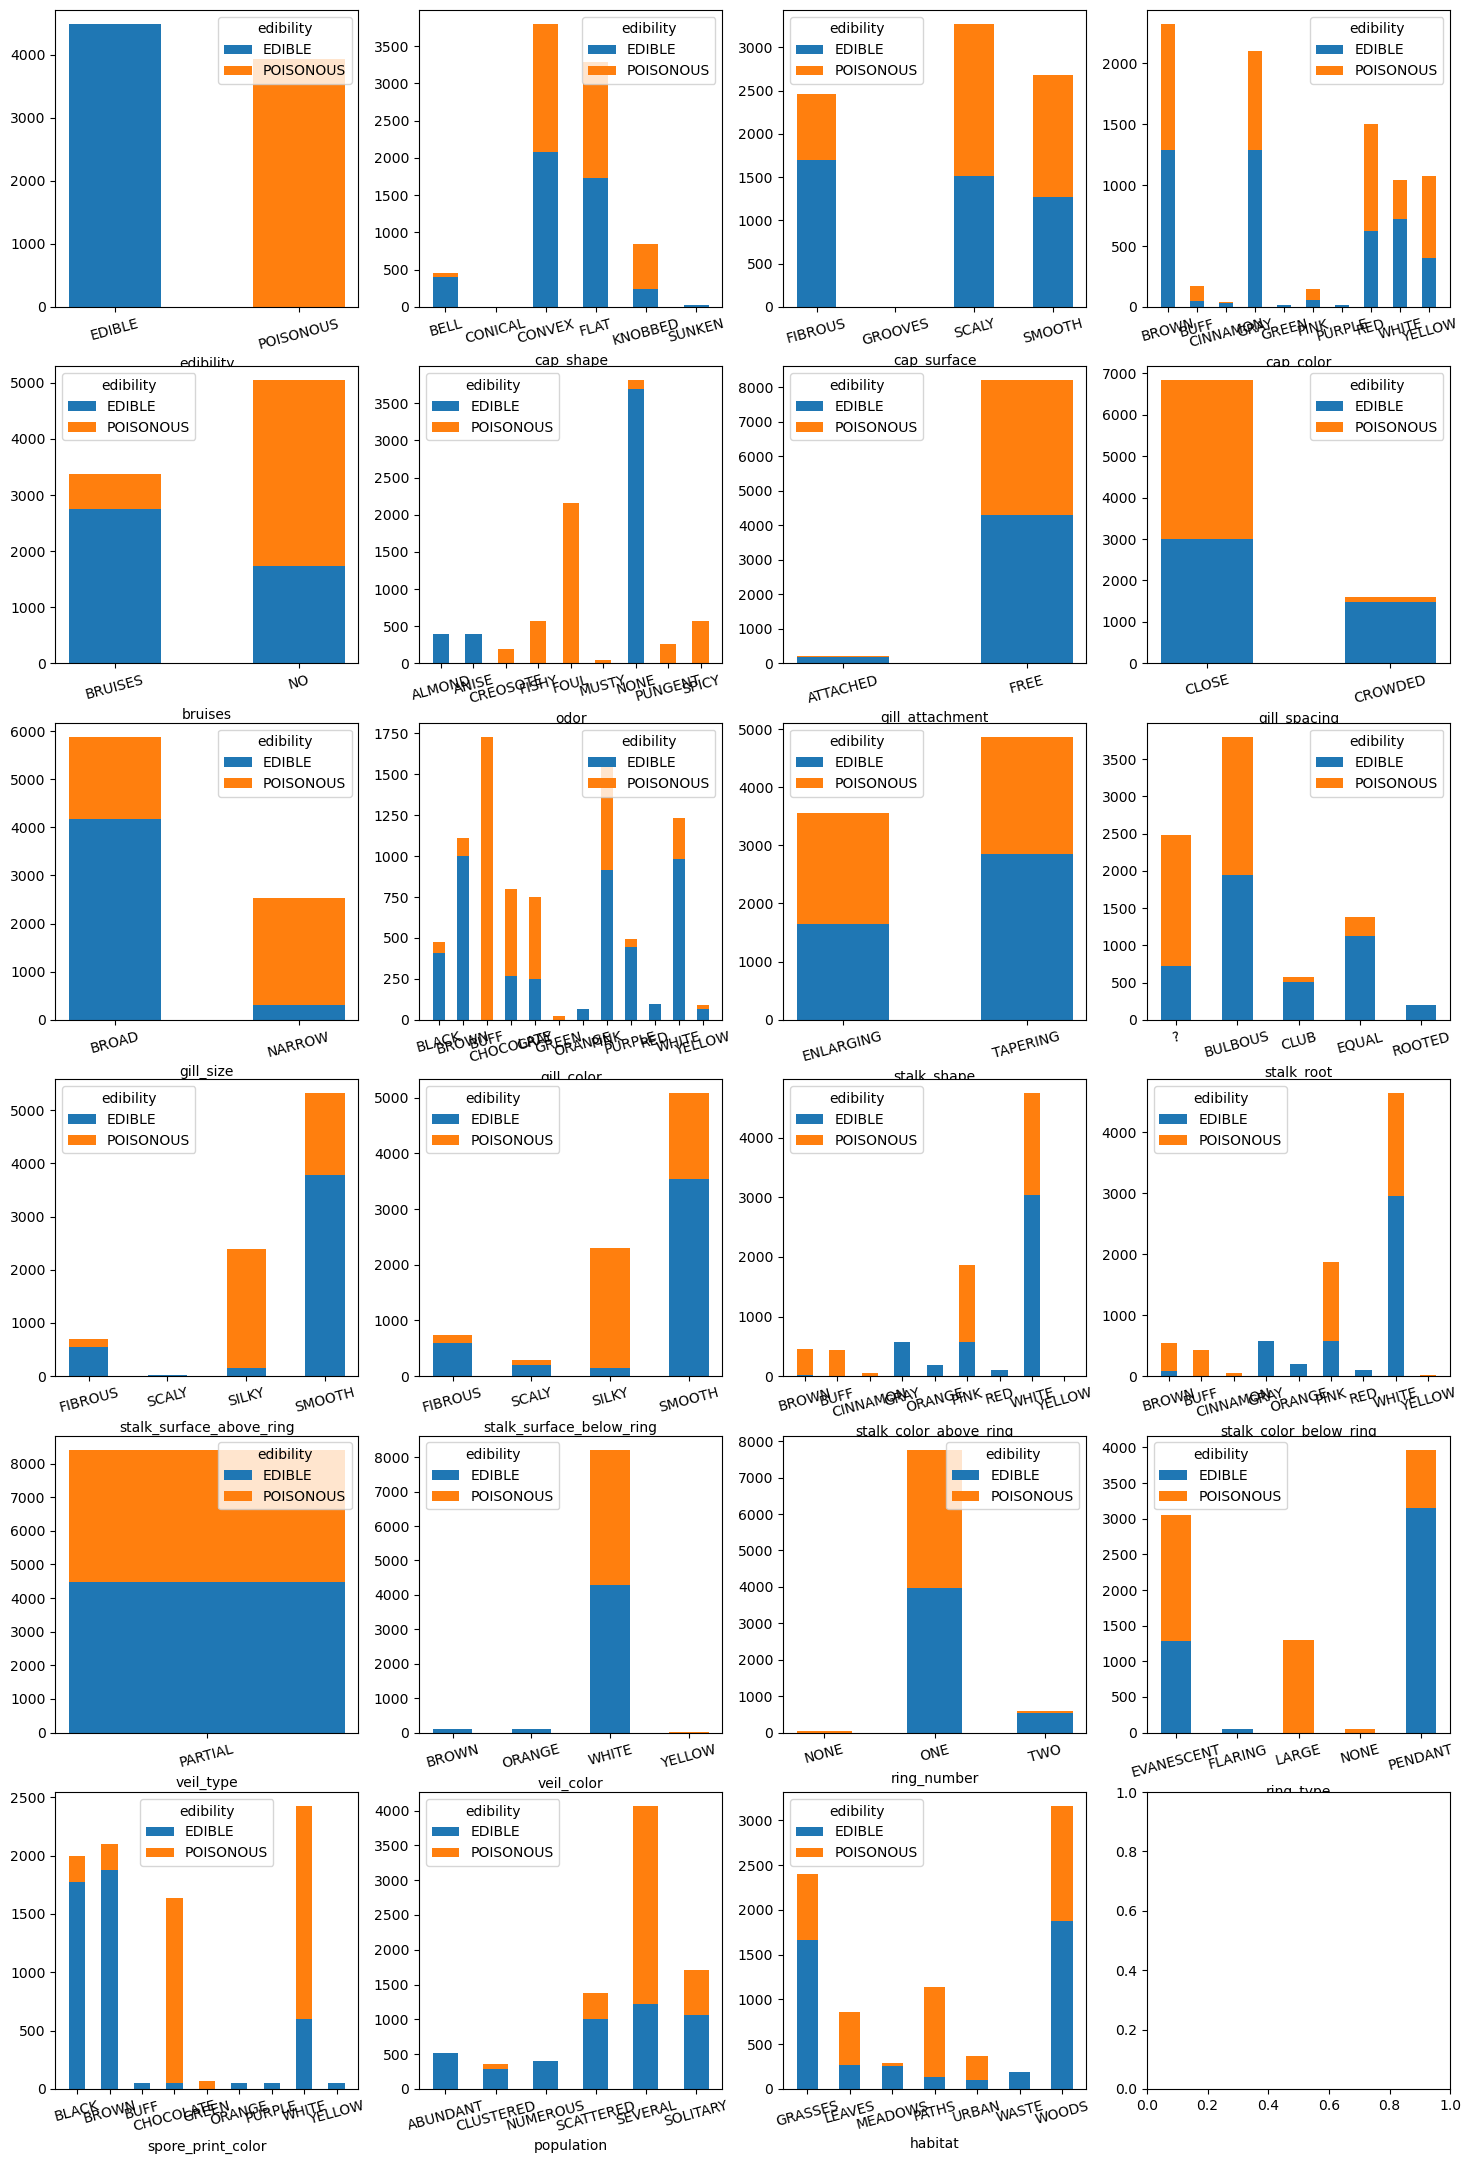

In [9]:
# Make a bar plot of the distribution of unique values for each column
# Within each bar, poisonous mushrooms are shown in red, while edible mushrooms are shown in blue
# Stack the bars on top of each other

# Import file
rev_train = pd.read_csv('../Project Code/Data/expanded', delimiter='\t', header=None, names=['characteristics'])
rev_train = rev_train['characteristics'].str.split(',', expand=True)
rev_train = rev_train.drop(range(7)).reset_index(drop=True)

rev_train = rev_train.drop(rev_train[rev_train.isnull().any(axis=1)].index)

# Implement descriptive column names
column_names = ['edibility','cap_shape', 'cap_surface', 'cap_color', 'bruises', 
                'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color', 
                'stalk_shape', 'stalk_root', 'stalk_surface_above_ring', 'stalk_surface_below_ring', 
                'stalk_color_above_ring', 'stalk_color_below_ring', 'veil_type', 'veil_color', 
                'ring_number', 'ring_type', 'spore_print_color', 'population','habitat']
rev_train.columns = column_names

num_cols = len(rev_train.columns)

num_graph_cols = 4
num_graph_rows = int(np.ceil(num_cols / num_graph_cols))

fig, axs = plt.subplots(num_graph_rows, num_graph_cols, figsize=(18, num_graph_rows * 4.5))

for col in rev_train.columns:
    rev_train.groupby(col)['edibility'].value_counts().unstack().plot(kind='bar', stacked=True, ax=axs.flat[rev_train.columns.get_loc(col)])
    # turn the axis labels 45 degrees
    axs.flat[rev_train.columns.get_loc(col)].tick_params(axis='x', rotation=15)
    # Set axes tight
    axs.flat[rev_train.columns.get_loc(col)].axis('tight')

The above plots allow us to see the distribution of values within each categorical variable, and the distribution of edible/poisonous mushrooms in each category. We were able to remove certain columns as they did not have a sufficient distribution accross edibility categories, and we were able to see which columns were useful in predicting the target variable. The odor plot is revealing in particular, as it shows that each odor correlates almost exactly to edible or poisonous

## Approach

In order to create a useful model to solve our challenge, we used a logistic model to categorize a mushroom as either edible (1) or poisonous (0). We aimed to optimize for our False Positive Rate since a false positive would be the most disasterous for a user of our model. A false positive would indicate that a mushroom is safe to consume, despite that not being the case. We wanted to make this measurment less than 5%.

We anticipated it would be difficult to determine which variables/categories most contributed to the edibility since they were all categorical, were ultimately proven correct as will be discussed further in the next section.

While we did construct an incredibly successful first model, we felt it lacked the spirit and challenge of the issue at hand and attempted to create a more robust model, which, while unsucessful in achieving the FPR of 5% desired, it did succeed in its attempt to be less susceptible to human input / classification error for the categories.

The code used for this project was prepared using no existing solution, nor repository for constructing the model. 

## Developing the model - INCOMPLETE

Following our EDA we found the odor was a strong indicator of whether or not a mushroom was poisonous or edible because odors were either 100% or 0% edible in all but one case where it was ~97% edible. This was constructed as a logit model and was icredibly simple with just one predictor (`poisonous ~ odor`, threshold of 0.5). Despite offering a 98.5% accuracy, 100% precision, and 96.8% recall on our test set, we ultimately found this model to be impractical odor is incredibly subjective and hard to categorize in most scenarios, and a wrong classification of odor would have a devistating effect on the outcome received. 

To build a more useful and safer model, we removed oder as a predictor, and using multiple others, resulted in a logit model with a formula: `poisonous ~ cap_shape + cap_surface + cap_color + bruises + gill_attachment + gill_spacing + gill_size + stalk_color_above_ring`, threshold of 0.4. This model, while slightly inferior to the prior model on paper, is significantly more robust, and provides stakeholders with more security in the resonse they get based upon their entries. This model achieved a 96.7% accuracy, 95.4% precision, and 97.7% recall.

This second model unfortunately fell a bit short of our desired False Positive Rate of 5%, coming in at approximately 4.2%. We attempted numerous other methods to improve our model, such as stepwise selection, but ultimately were unable to improve our product due to lack of model interpretability through one-hot encoding and label encoding. The code for model experimentation is included in a separate code file. 

### One-hot Encoding & Stepwise Selection

Due to the constraints of a singular matrix in training our logistic regression model, we decided to use the one-hot encoding method. This technique represents categorical variables numerically in a way that can be easily used in machine learning models. In our dataset, we had 22 categorical variables, each belonging to a finite set of discrete categories. We removed odor, because it is a subjective predictor that's impractical to use, and consequently transformed the remaining ones into 107 predictors in the form of binary vectors. This enables us to use the predictors in our subsequent procedure of subset selection for machine learning algorithms.

We calculated the Variance Inflation Factor (VIF) for all 107 predictors and found that a subset of predictors among them had VIFs of infinity, indicating that they suffer from multicollinearity. This result suggests that we must perform feature selection by eliminating some insignificant or highly correlated predictors. Initially, we experimented with forward stepwise selection and found some perfect models with 100% accuracy and 0% false positive rates. However, these perfect models included a large number of predictors, making them difficult to interpret. Despite the flexibility offered by stepwise selection algorithms that allows us to select the best model under different number of features, the "decent" model that we have now still has low interpretability. The one-hot encoding method made it nearly impossible for stakeholders to interpret and act on the model in any ways. When visualizing the plot of accuracy against number of predictors and fpr against number of predictors, we found an unusual pattern: while accuracy increases with the number of predictors, fpr doesn't, and has an extremely low rates at around 0-20 predictors. The variables related to Odor might play a role here, but it also suggest that we have a chance of getting fpr really low by using a small subset of predictors. However, again, the corresponding accuracy would suffer, which is also what we don't want to see.

##可以删Therefore, after experimenting with forward stepwise selection, we decided to further experiment with label encoding and see if this would work out better.

### Label Encoding & Stepwise Selection

## Limitations of the model with regard to inference / prediction

Our model should only be applied to mushrooms within the Agaricus and Lepiota Genuses as this is where the data set is built from. A mushroom from any other genus would not be as likely to fall within the bounds of the model created. Since all characteristics used to determine edibility in the model are able be determined using only the primary senses, it is accessible to most people. Since color is a recurring and influential source of information for the model, individuals with any forms of colorblindness will likely be unable to utilize it.

There is no set expiration date or condition that would inherently made the data obsolete. As new mushrooms are discovered, they can be added to the training set to continually improve the model. If, at some point, a large number of new mushrooms are discovered that consistently do not align with the model, it would need to be re-evaluated, and have the features used to characterize revisited.

## Conclusions and Recommendations to stakeholder(s)

Based upon our model, stakeholders should feel relatively confident using it. We achieved a XX% accuracy and XX% recall rate indicating that the model is accurate and has a low false positive rate. A low false positive rate indicates that there is a low probability that the model will predict a mushroom to be edible, when in fact it is poisonous - the most consiquential outcome possible. With this in mind, users should acknowledge the source of the mushroom, as a mushroom growing in an urban environment or out of paved areas are exceedingly likely to be poisonous. Furthermore, for this model to be useful, the interpretation of the secondary characteristics into the potential categories for each, must match that of the data we used. That is, the individual assessing the mushroom must have similar opinion of the classification for each characteristic as the individual responsible for curating the dataset. This is a large source of limitation in our models ability as there is a large potential source of human error. Lastly, accuracy of the data entered for a prediction is crucial as many mushrooms appear nearly identical with only one or two minor distiguishing features. This is the source of collinearity in the model, but also leads to further potential for incorrect result due to poor quality input data.

## GitHub and individual contribution {-}

Please see our GitHub repository <a href="https://github.com/jprette/STAT303-2_Project_Information_Superhighway">**HERE** (https://github.com/jprette/STAT303-2_Project_Information_Superhighway)</a>.

<html>
<style>
table, td, th {
  border: 1px solid black;
}

table {
  border-collapse: collapse;
  width: 100%;
}

th {
  text-align: left;
}
    

</style>
<body>

<h2>Individual contribution - INCOMPLETE</h2>

<table style="width:100%">
     <colgroup>
       <col span="1" style="width: 15%;">
       <col span="1" style="width: 20%;">
       <col span="1" style="width: 50%;">
       <col span="1" style="width: 15%;"> 
    </colgroup>
  <tr>
    <th>Team member</th>
    <th>Contributed aspects</th>
    <th>Details</th>
    <th>Number of GitHub commits</th>
  </tr>
  <tr>
    <td>Jackson Bremen</td>
    <td>Model Development/ EDA / Forward Selection Experimentation / Final Report</td>
    <td>Worked on the initial development of logistic regression models, helped decide on threshold selections, evaluated performance, attempted forward selection to help narrow down features, and worked on creating final report</td>
    <td>I was flattening my commits, so most of them did not get included in the overall tally when they got merged to main</td>
  </tr>
  <tr>
    <td>Lucy Han</td>
    <td>Model development / one-hot encoding / stepwise subset selection / project report</td>
    <td>Assisted with model development, evaluated performance metrics; performed on-hot encoding on variables and executed forward stepwise selection; observed multicollinearity through VIF and suggested appropriate feature selection.</td>
    <td>???</td>
  </tr>
    <tr>
    <td>Chanel Sun</td>
    <td>Aspect.</td>
    <td>Detail.</td>
    <td>???</td>    
  </tr>
    <tr>
    <td>Joseph Prette</td>
    <td>Data Cleaning / EDA / Project Report</td>
    <td>Expored the data and found issues that would decrease efficacy of the model. Prepared the code file from mulitple team members work, prepared final project report and code documentation.</td>
    <td>???</td>
  </tr>
</table>

### GitHub Review
GitHub provided a consistent method to share files, track progress, and monitor team member contributions throughout the project. While certainly beneficial in these respects, it was not without its difficulties. GitHub was tricky to use for new those in our group inexperienced with it prior to this course, and made traditional efforts in collaboration difficult as only one person could work on the file at a time without large amounts of errors to resolve, and reduced the ability to collaborate side-by-side, as the commits and log history would only reflect the individual who's computer it is on. With all that said, it certainly did streamline to process overall and make it simpler to produce a high quality project.

## References

[1] Jonan Pilet. Misidentification increases the risk of poisoning as mushroom hunters head out to forage, 2018. Food Safety News. Supplied as background information.
